In [1]:
# import the neccessary libraries
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#load the data 
df = pd.read_csv('C:/Users/Teddy/Documents/Australian AutoMobile Market/cars.csv')


In [4]:
#view first few records of data
df.head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [5]:
#what are the variable datatypes?
df.dtypes

ID                   int64
Name                object
Price                int64
Brand               object
Model               object
Variant             object
Series              object
Year                 int64
Kilometers           int64
Type                object
Gearbox             object
Fuel                object
Status              object
CC                   int64
Color               object
Seating Capacity     int64
dtype: object

In [7]:
#check the shape of the data
df.shape

(17048, 16)

In [8]:
#check for missing values
df.isnull().values.any()


False

In [9]:
df.isna().sum()

ID                  0
Name                0
Price               0
Brand               0
Model               0
Variant             0
Series              0
Year                0
Kilometers          0
Type                0
Gearbox             0
Fuel                0
Status              0
CC                  0
Color               0
Seating Capacity    0
dtype: int64

In [10]:
#check for duplicate rows
duplicate_rows = df.duplicated().values.any()



In [11]:
#summary statistics of the numeric data
df.describe()

,ID,Price,Year,Kilometers,CC,Seating Capacity
count,1.704800e+04,17048.000000,17048.000000,1.704800e+04,17048.000000,17048.000000
mean,1.279027e+07,36777.778038,2015.481288,1.032314e+05,2491.830303,5.115849
std,5.051111e+04,30305.015328,4.721591,8.041313e+04,881.985562,1.121791
min,1.153013e+07,1000.000000,1989.000000,1.000000e+00,875.000000,2.000000
25%,1.275715e+07,18800.000000,2013.000000,4.450225e+04,1987.000000,5.000000
50%,1.280207e+07,29990.000000,2016.000000,8.845400e+04,2354.000000,5.000000
75%,1.283131e+07,45990.000000,2019.000000,1.488735e+05,2981.000000,5.000000
max,1.285246e+07,999000.000000,2022.000000,2.700000e+06,7300.000000,14.000000


Analyze relationships between variables

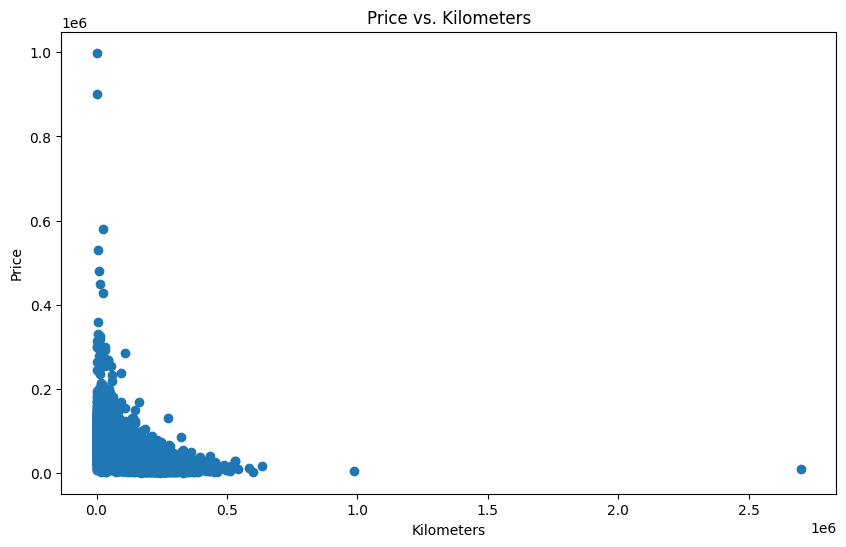

In [12]:
#Scatter plot: Price vs. Kilometers
plt.figure(figsize=(10, 6))
plt.scatter(df['Kilometers'], df['Price'])
plt.xlabel('Kilometers')
plt.ylabel('Price')
plt.title('Price vs. Kilometers')
plt.show()


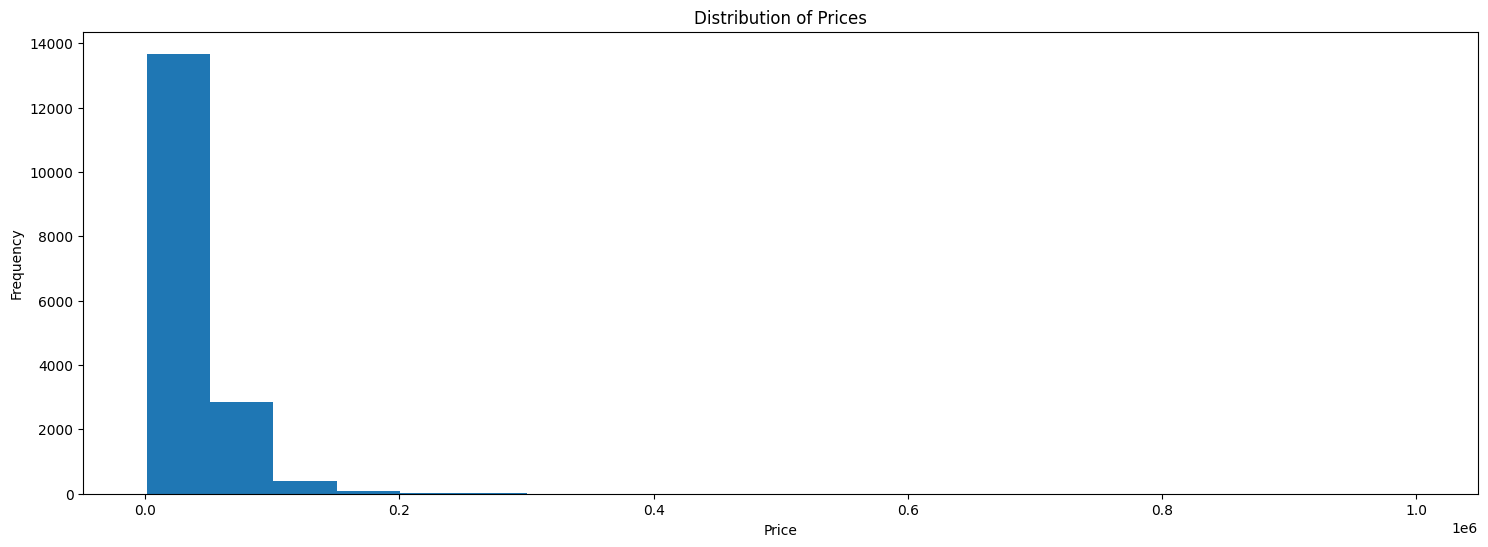

In [13]:
#Histogram of the price variable
plt.figure(figsize=(18, 6))
plt.hist(df['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()


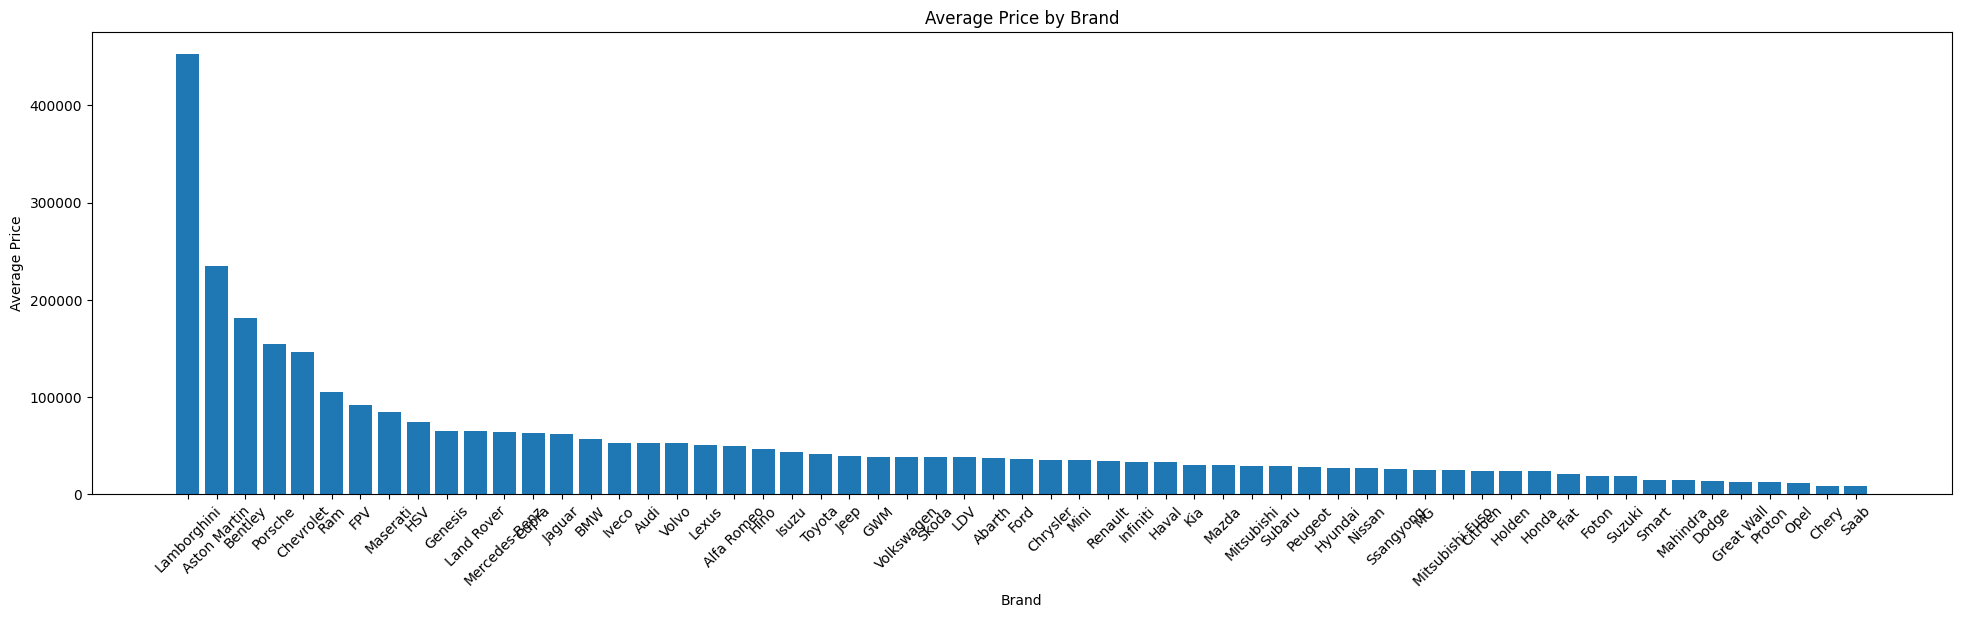

In [14]:
#Bar plot: Average Price by Brand
brand_avg_price = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(24, 6))
plt.bar(brand_avg_price.index, brand_avg_price.values)
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Price by Brand')
plt.xticks(rotation=45)
plt.show()

In [15]:
#Grouping by Brand and calculating average price and count
brand_stats = df.groupby('Brand').agg({'Price': ['mean', 'count']})
print(brand_stats)


                         Price      
                          mean count
Brand                               
Abarth            37493.800000     5
Alfa Romeo        49282.545455    11
Aston Martin     235120.000000     2
Audi              52605.027027   518
BMW               56373.000000   480
Bentley          181405.428571     7
Chery              8749.500000     2
Chevrolet        145833.857143     7
Chrysler          35253.595238    42
Citroen           24233.384615    13
Cupra             62334.200000     5
Dodge             13836.214286    14
FPV               91490.000000     2
Fiat              20448.529412    17
Ford              36091.152349  1490
Foton             18972.000000     4
GWM               38250.793103    29
Genesis           64888.000000     1
Great Wall        12300.851852    27
HSV               74036.162162    37
Haval             32565.285714     7
Hino              46500.000000     1
Holden            23343.577409  1505
Honda             23326.019370   413
H

In [16]:
#Grouping by Brand and calculating average price and count, sorting by the mean price
brand_stats = df.groupby('Brand').agg({'Price': ['mean', 'count']}).sort_values(('Price', 'mean'))
print(brand_stats)


                         Price      
                          mean count
Brand                               
Saab               8435.000000     2
Chery              8749.500000     2
Opel              11838.250000     4
Proton            11990.000000     1
Great Wall        12300.851852    27
Dodge             13836.214286    14
Smart             13990.000000     1
Mahindra          13990.000000     1
Suzuki            18956.243750   160
Foton             18972.000000     4
Fiat              20448.529412    17
Honda             23326.019370   413
Holden            23343.577409  1505
Citroen           24233.384615    13
Mitsubishi Fuso   24900.000000     1
MG                24967.536082    97
Ssangyong         25287.363636    11
Nissan            26919.916667  1008
Hyundai           27240.912603  1087
Peugeot           27627.066667    45
Subaru            28556.454962   655
Mitsubishi        28923.222533  1074
Mazda             29900.791774  1167
Kia               30301.614247   744
H

In [17]:
#Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)


                        ID     Price      Year  Kilometers        CC  \
ID                1.000000 -0.047978  0.004708   -0.011543 -0.070773   
Price            -0.047978  1.000000  0.488033   -0.447490  0.298205   
Year              0.004708  0.488033  1.000000   -0.728515 -0.174578   
Kilometers       -0.011543 -0.447490 -0.728515    1.000000  0.185219   
CC               -0.070773  0.298205 -0.174578    0.185219  1.000000   
Seating Capacity  0.005320  0.046629  0.044151   -0.013088  0.029590   

                  Seating Capacity  
ID                        0.005320  
Price                     0.046629  
Year                      0.044151  
Kilometers               -0.013088  
CC                        0.029590  
Seating Capacity          1.000000  


C:\Users\Teddy\AppData\Local\Temp\ipykernel_13456\1873214020.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [18]:
#correlation between the listed columns
df_corr=df[['ID','Price','Year','Kilometers', 'CC']].corr()
df_corr



,ID,Price,Year,Kilometers,CC
ID,1.000000,-0.047978,0.004708,-0.011543,-0.070773
Price,-0.047978,1.000000,0.488033,-0.447490,0.298205
Year,0.004708,0.488033,1.000000,-0.728515,-0.174578
Kilometers,-0.011543,-0.447490,-0.728515,1.000000,0.185219
CC,-0.070773,0.298205,-0.174578,0.185219,1.000000


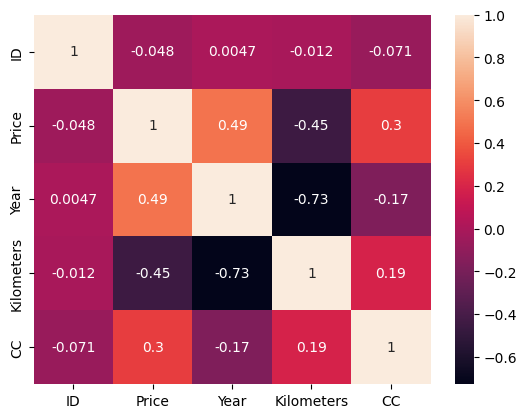

In [20]:
#correlation heatmap
sns.heatmap(df_corr, annot=True)
plt.show()



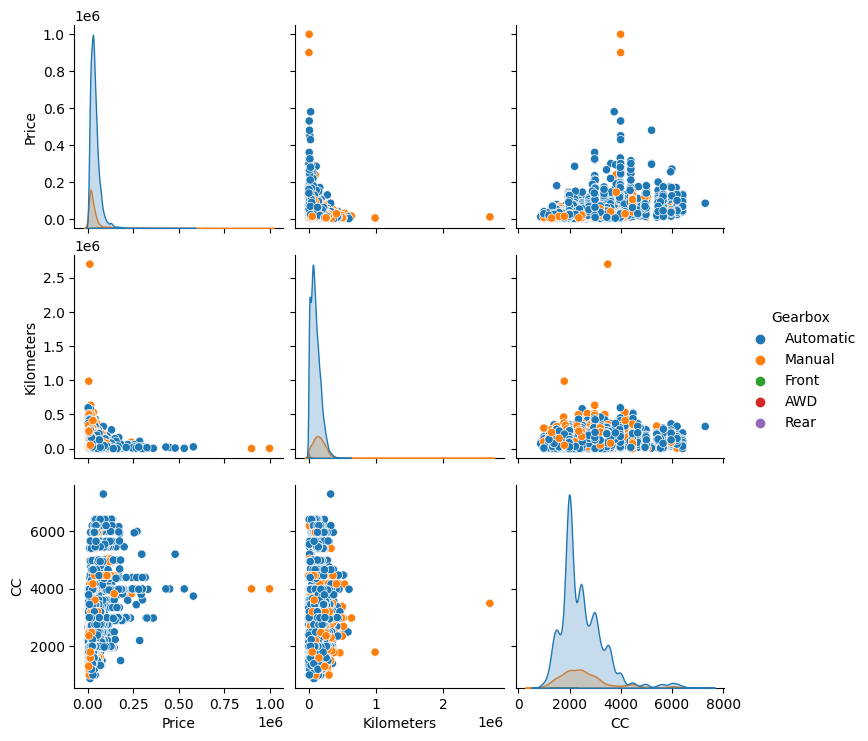

In [21]:
#pairplot of the listed variables
sns.pairplot(df, vars=['Price','Kilometers','CC'],hue='Gearbox')
plt.show()